# Long Jump Players Performance Across Age

This notebook analyzes long jump performance across different age groups.

## Key Questions

- How athletic ability develops and declines over an athlete’s lifecycle?

- What is the typical age of peak performance?

- Compare between elite and average athletes, highlighting differences in progression, consistency, and performance longevity?

- How many athletes jumped over 8 m?

# Import Data

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [133]:
df = pd.read_csv('../Data/cleaned_long_Jump.csv', low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211813 entries, 0 to 211812
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Rank          211813 non-null  int64  
 1   Mark          211813 non-null  float64
 2   Score         211813 non-null  int64  
 3   Pos           201202 non-null  object 
 4   Competitor    211813 non-null  object 
 5   Nat           211813 non-null  object 
 6   DOB           177735 non-null  object 
 7   Age           177735 non-null  float64
 8   Age Category  177735 non-null  object 
 9   Venue         211813 non-null  object 
 10  Date          211813 non-null  object 
 11  Year          211813 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 19.4+ MB


# Filtering

In [134]:
df[['Date', 'DOB']] = df[['Date', 'DOB']].apply(pd.to_datetime)

# Setting age range from 16 to 35 for sufficient data size
df = df[(df['Age'] >= 16) & (df['Age'] <= 35)]

Adding `Percentile` column grouped by `Age`

In [135]:
df['Percentile'] = (df.groupby('Age')['Mark'].rank(pct=True, ascending=True)) * 100

# Visualizations

### Average players performance

In [136]:
threshold = 90
avg_df = df[(df['Percentile'] <= threshold) & (df['Percentile'] >= 100 - threshold)]

age_stats = (
    avg_df.groupby('Age')['Mark']
    .agg(Median='median')
    .reset_index()
)

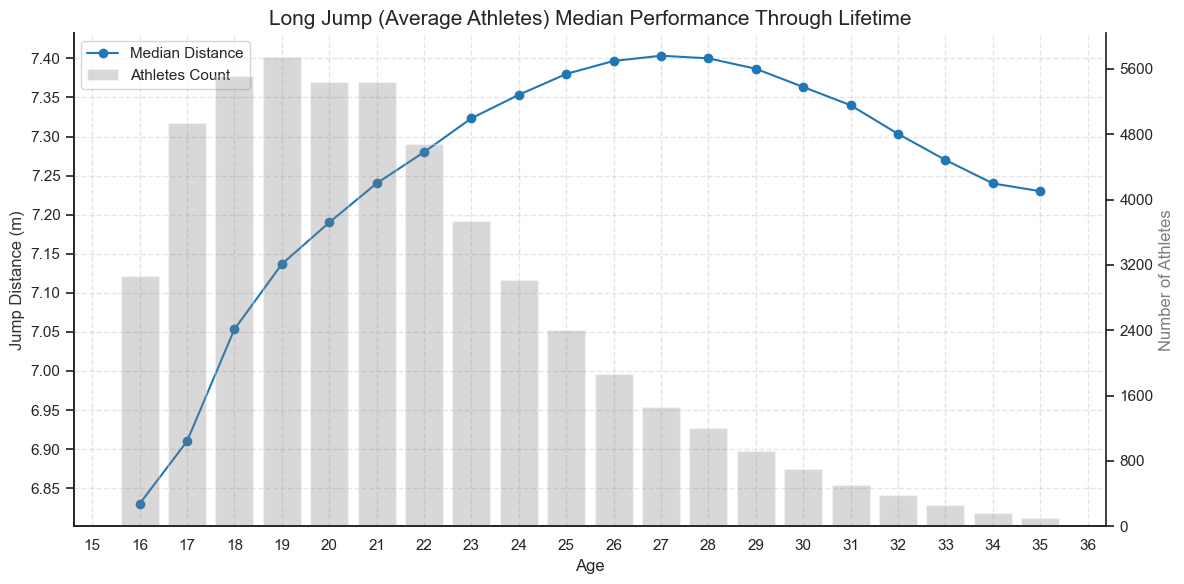

In [137]:
sns.set_theme(style='white')
fig, ax1 = plt.subplots(figsize=(12,6))


# --- Line plot: Median distance ---
x_line = age_stats['Age']
y_line = age_stats['Median'].rolling(window=3, center=True, min_periods=1).mean()

ax1.plot(x_line, y_line, label='Median Distance', marker='o', color='tab:blue')
ax1.set_xlabel('Age')
ax1.set_ylabel('Jump Distance (m)', color='#333333')
ax1.set_title('Long Jump (Average Athletes) Median Performance Through Lifetime', fontsize=15)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.grid(linestyle='--', alpha=0.5)


# --- Bar plot: Age distribution (raw counts) ---
age_count = df.groupby('Age')['Competitor'].nunique()
x_bar = age_count.index
y_bar = age_count.values

ax2 = ax1.twinx()
ax2.bar(x_bar, y_bar, alpha=0.3, color='tab:gray', label='Athletes Count')
ax2.set_ylabel('Number of Athletes', color='tab:gray')
ax2.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

ax2.spines['top'].set_visible(False)


# Legends
lines, labels = ax1.get_legend_handles_labels()
bars, bar_labels = ax2.get_legend_handles_labels()
ax1.legend(lines + bars, labels + bar_labels, loc='upper left')


plt.tight_layout()
plt.show()

### Elite players performance

In [138]:
threshold = 90
elite_df = df[df['Percentile'] >= threshold]

elite_age_stats = (
    elite_df.groupby('Age')['Mark']
    .agg(Median='median')
    .reset_index()
)

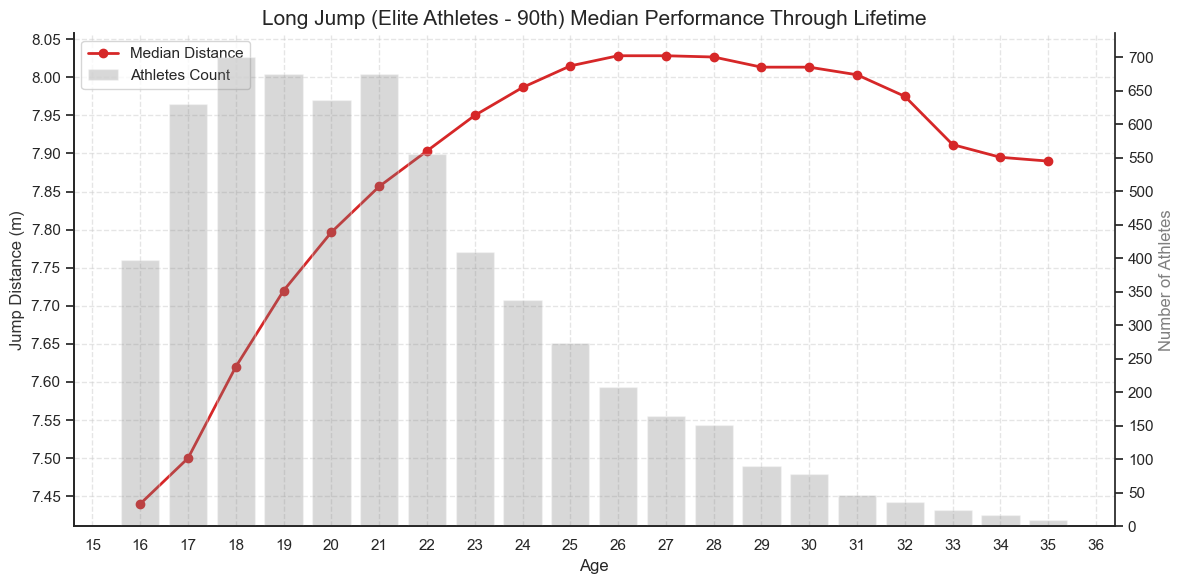

In [139]:
sns.set_theme(style='white')
fig, ax1 = plt.subplots(figsize=(12, 6))


# --- Line plot: Median distance ---
x_line = elite_age_stats['Age']
y_elite_line = elite_age_stats['Median'].rolling(window=3, center=True, min_periods=1).mean()

ax1.plot(x_line, y_elite_line, label=f'Median Distance', marker='o', color='tab:red', linewidth=2)
ax1.set_xlabel('Age')
ax1.set_ylabel('Jump Distance (m)', color='#333333')
ax1.set_title(f'Long Jump (Elite Athletes - {threshold}th) Median Performance Through Lifetime', fontsize=15)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax1.spines['top'].set_visible(False)

ax1.grid(linestyle='--', alpha=0.5)


# --- Bar plots: Sample Size ---
elite_age_count = elite_df.groupby('Age')['Competitor'].nunique()

x_line = elite_age_count.index
y_bar_elite = elite_age_count.values

ax2 = ax1.twinx()
ax2.bar(x_bar, y_bar_elite, alpha=0.3, color='tab:gray', label='Athletes Count')
ax2.set_ylabel('Number of Athletes', color='gray')

ax2.yaxis.set_major_locator(ticker.MultipleLocator(50))
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)


# --- Legend ---
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')


plt.tight_layout()
plt.show()

### Comparison

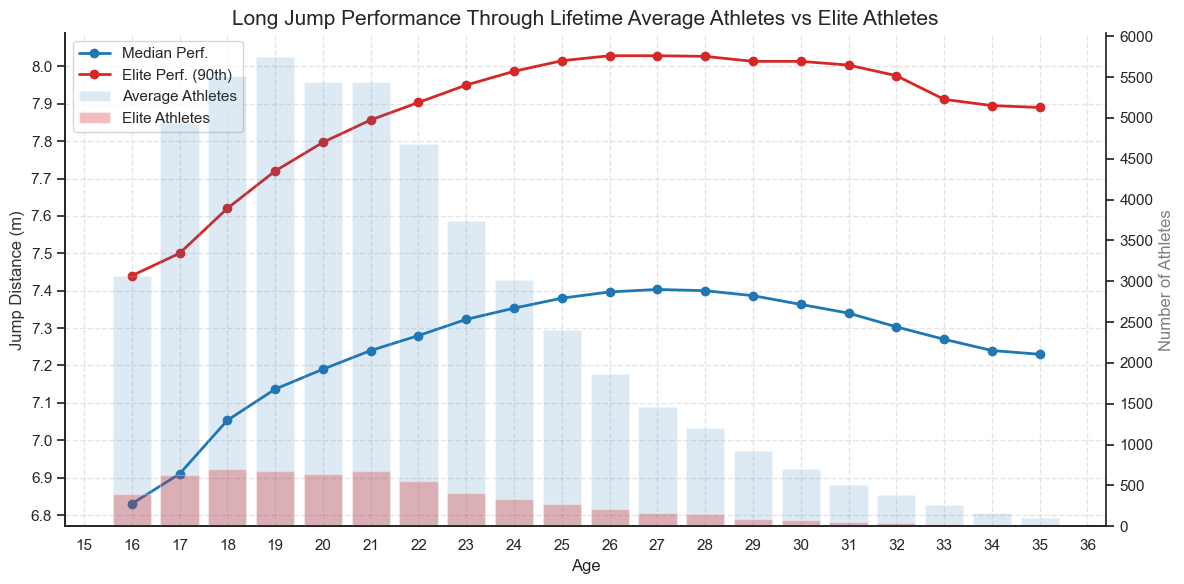

In [140]:
sns.set_theme(style='white')
fig, ax1 = plt.subplots(figsize=(12, 6))


# --- Line plots: Median vs Elite Performance ---
ax1.plot(x_line, y_line, label='Median Perf.', marker='o', color='tab:blue', linewidth=2)
ax1.plot(x_line, y_elite_line, label=f'Elite Perf. ({threshold}th)', marker='o', color='tab:red', linewidth=2)

ax1.set_xlabel('Age')
ax1.set_ylabel('Jump Distance (m)', color='#333333')
ax1.set_title('Long Jump Performance Through Lifetime Average Athletes vs Elite Athletes', fontsize=15)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax1.spines['top'].set_visible(False)
ax1.grid(linestyle='--', alpha=0.5)


# --- Bar plots: Sample Size (Context) ---
x_bar = age_count.index
y_bar_total = age_count.values
y_bar_elite = elite_age_count

ax2 = ax1.twinx()
ax2.bar(x_bar, y_bar_total, alpha=0.15, color='tab:blue', label='Average Athletes')
ax2.bar(x_bar, y_bar_elite, alpha=0.3, color='tab:red', label='Elite Athletes')

ax2.set_ylabel('Number of Athletes', color='gray')
ax2.yaxis.set_major_locator(ticker.MultipleLocator(500))
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)


# --- Legend ---
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')


plt.tight_layout()
plt.show()

### How many athletes jumped over 8 m

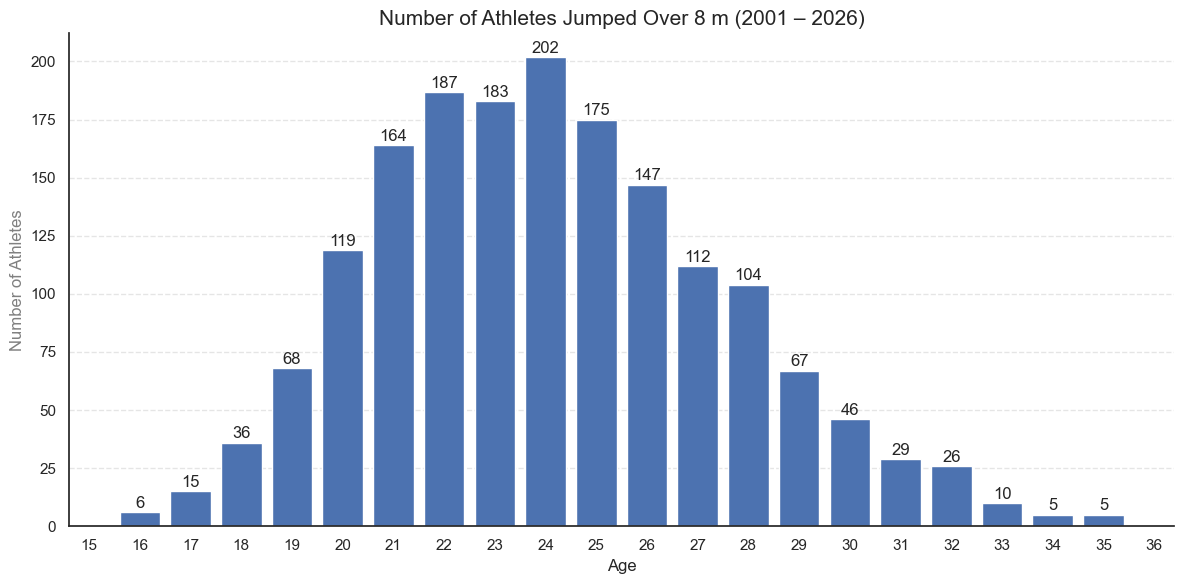

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

over8_count = (
    df[df['Mark'] >= 8]
    .groupby('Age')['Competitor']
    .nunique()
)

sns.set_theme(style='white')
plt.figure(figsize=(12,6))

x = over8_count.index
y = over8_count.values

bars = plt.bar(x, y, label="Total Athletes")

plt.title("Number of Athletes Jumped Over 8 m (2001 – 2026)", fontsize=15)
plt.xlabel("Age")
plt.ylabel("Number of Athletes", color="gray")

ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

for bar in bars:
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.5,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=12
        )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()